# Fast Fourier Transforms(fft)

<a id="fft"></a>
## 0. Fast Fourier Transform 

FFT stands for Fast Fourier Transform. This is a method to analyze a signal from a different perspective by transforming a signal expressed in the time domain into the frequency domain.

 If you want to perform Fourier transform in Python, you can use the <code>np.fft.fft( )</code> function as follows.

<img src="./../img/code/fft.gif">

The picture above is from the FFT article on Wikipidea. As you can see, he complex-looking signal in red can be described by multiple trigonometric (삼각함수) waveforms.

#### Example 1

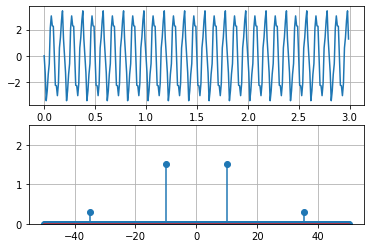

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100 
t = np.arange(0, 3, 1 / fs)
f1 = 35
f2 = 10

# Set a 0.6-amplitude signal with 35Hz and a 3-amplitude signal with 10Hz
# Add two signals to create new one
signal = 0.6 * np.sin(2 * np.pi * f1 * t) + 3 * np.cos(2 * np.pi * f2 * t + np.pi/2)

# Fourier transform is implemented with np.fft.fft()
# We need to divide the return value of function by the length of the signal
# Normalization, otherwise fft_magnitude becomes very large.
fft = np.fft.fft(signal) / len(signal)  
 
fft_magnitude = abs(fft)   # abs(np.fft.fft()) = magnitude graph


plt.subplot(2,1,1)
plt.plot(t,signal)
plt.grid()
 
plt.subplot(2,1,2)
length = len(signal)

# np.linspace(start,end,num):
# Produce the number of num variables from start to end at regular intervals. 
# So, 300 pieces of data generated at regular intervals from -50 to 50 
# are stored in the variable f.
f = np.linspace(-(fs / 2), fs / 2, length)  
plt.stem(f, np.fft.fftshift(fft_magnitude)) # np.fft.fftshift( )는 change the return order as 'negative → positive'
plt.ylim(0,2.5)
plt.grid()

plt.show()

#### Example 2
ref: https://pinkwink.kr/1370

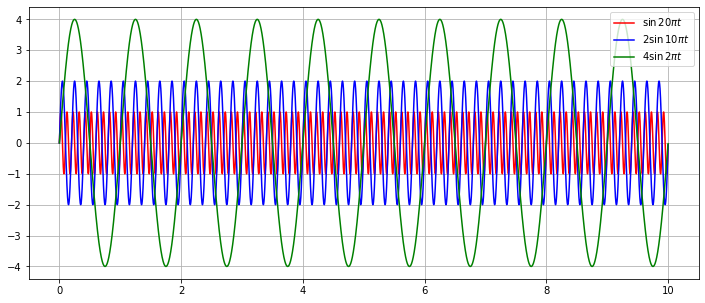

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

# Time interval set to 0.001 (=1 milli-sec) and we have defined the time as a variable from 0 to 10 seconds.
# created data called sin1, sin2, and sin3 with the magnitudes are 1, 2, and 4, respectively, and the frequencies are 10, 5, and 1Hz.
time = np.arange(0, 10, 0.001)  
sin1 = sin_wave(1, 10, time) 
sin2 = sin_wave(2, 5, time) 
sin3 = sin_wave(4, 1, time)

# Simple wave
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green')
plt.legend(); plt.grid(); plt.show()

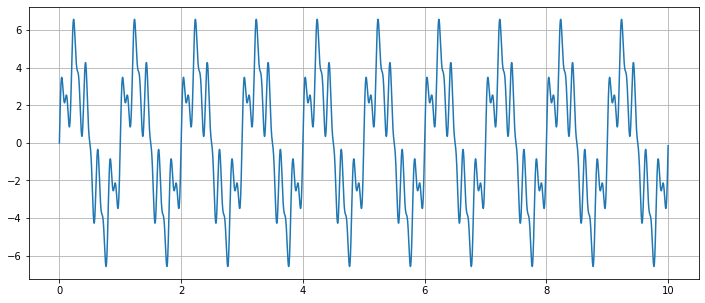

In [5]:
# Combine three signals
sin_sum = sin1 + sin2 + sin3

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

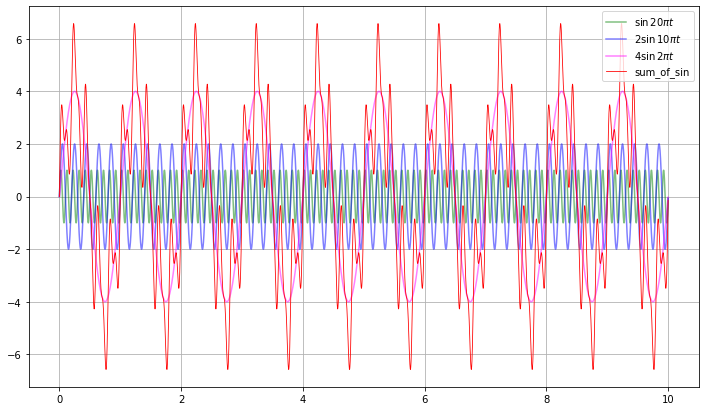

In [7]:
# Let's draw all four signals at once

plt.figure(figsize=(12,7))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='green', alpha=0.5)
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue', alpha=0.5)
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='magenta', alpha=0.5)
plt.plot(time, sin_sum, label="sum_of_sin", color='red', lw=0.8)
plt.legend(); plt.grid(); plt.show()

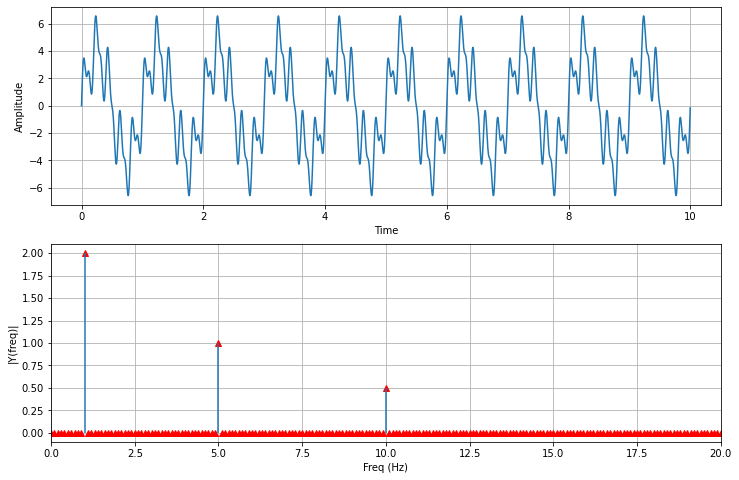

In [8]:
n = len(sin_sum) 
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))]

# By using fft function, time domain is changed as the frequency domain.
# sin_sum is the sum of 1, 5, 10 Hz signals, so it should be result.
Y = np.fft.fft(sin_sum)/n 
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)        # First graph = sin_sum
ax[0].set_xlabel('Time')  
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True) 
plt.show()

In the second graph, you can see the 1, 5, 10Hz signal. And, all of them have a half of each Hz.

#### Example 3

ref: https://sdc-james.gitbook.io/onebook/4.-numpy-and-scipy/4.3-scipy/4.3.3.-fast-fourier-transforms-scipy.fftpack

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


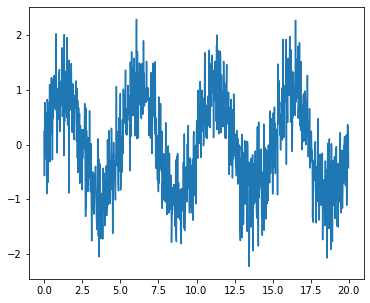

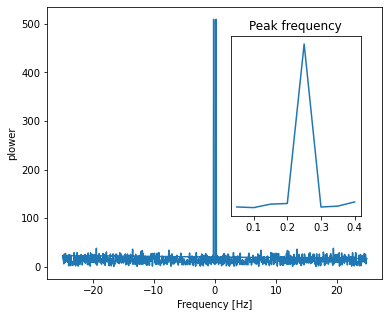

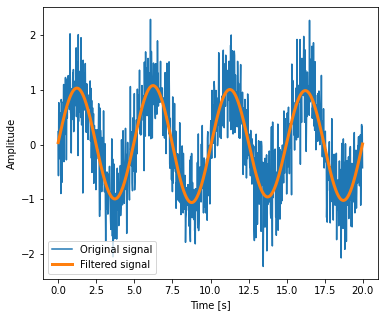

In [10]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

#신호를 생성합니다.
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

#FFT의 Power를 계산합니다.
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
# scipy.signal.find_peaks_cwt can also be used for more advanced  peak detection


#모든 high frequencies를 제거합니다.
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

plt.show()